# Data Characteristics
Import our data frames and play around to see what characteristics we have in our data

In [2]:
# import processed df from ../data/processed/df_merged_extended_weather.csv
import pandas as pd
df_merged_extended_weather = pd.read_csv("../data/processed/df_merged_extended_weather.csv")
display(df_merged_extended_weather.shape)
df_merged_extended_weather.head()

(9334, 15)

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,id_umsatz,Warengruppe_umsatz,Umsatz_umsatz,day_of_week,day,precipitation_hours,sunshine_duration,rain_sum,temperature_2m_mean,sunshine_hours
0,2013-07-01,0,6.0,17.8375,15.0,1307011,1.0,148.828353,0,Monday,7.0,31025.67,1.0,15.6,8.618242
1,2013-07-01,0,6.0,17.8375,15.0,1307012,2.0,535.856285,0,Monday,7.0,31025.67,1.0,15.6,8.618242
2,2013-07-01,0,6.0,17.8375,15.0,1307013,3.0,201.198426,0,Monday,7.0,31025.67,1.0,15.6,8.618242
3,2013-07-01,0,6.0,17.8375,15.0,1307014,4.0,65.890169,0,Monday,7.0,31025.67,1.0,15.6,8.618242
4,2013-07-01,0,6.0,17.8375,15.0,1307015,5.0,317.475875,0,Monday,7.0,31025.67,1.0,15.6,8.618242


In [5]:
import scipy.stats as stats
import seaborn as sns
# Testing Regression
#reg_cols=['Umsatz_umsatz','umsatz_rolling7','KielerWoche_kiwo','Bewoelkung_weather', 'rain_sum', 'sunshine_hours','Temperatur_weather','Windgeschwindigkeit_weather','precipitation_hours','day_of_week']
reg_cols=['Umsatz_umsatz','KielerWoche_kiwo','Bewoelkung_weather', 'rain_sum', 'sunshine_hours','Temperatur_weather','Windgeschwindigkeit_weather','precipitation_hours','day_of_week']
#sns.pairplot(df_merged_extended_weather[reg_cols].dropna())
df_merged_extended_weather[reg_cols].corr()

,Umsatz_umsatz,KielerWoche_kiwo,Bewoelkung_weather,rain_sum,sunshine_hours,Temperatur_weather,Windgeschwindigkeit_weather,precipitation_hours,day_of_week
Umsatz_umsatz,1.000000,0.058244,-0.089410,-0.006203,0.172404,0.222754,0.014656,-0.035543,0.136199
KielerWoche_kiwo,0.058244,1.000000,0.011505,0.023145,0.088911,0.138329,0.020482,0.026237,0.042733
Bewoelkung_weather,-0.089410,0.011505,1.000000,0.272869,-0.650125,-0.391204,0.040599,0.427817,-0.004879
rain_sum,-0.006203,0.023145,0.272869,1.000000,-0.266330,0.029935,0.144634,0.778271,0.012229
sunshine_hours,0.172404,0.088911,-0.650125,-0.266330,1.000000,0.625493,0.075587,-0.376662,-0.017579
Temperatur_weather,0.222754,0.138329,-0.391204,0.029935,0.625493,1.000000,0.004367,-0.113850,0.004351
Windgeschwindigkeit_weather,0.014656,0.020482,0.040599,0.144634,0.075587,0.004367,1.000000,0.191661,-0.005762
precipitation_hours,-0.035543,0.026237,0.427817,0.778271,-0.376662,-0.113850,0.191661,1.000000,-0.007771
day_of_week,0.136199,0.042733,-0.004879,0.012229,-0.017579,0.004351,-0.005762,-0.007771,1.000000


In [ ]:
# displaying umsatz correlations
correlations = df_merged_extended_weather[reg_cols].corr()['Umsatz_umsatz'].sort_values(ascending=False)
print(correlations)

Umsatz_umsatz                  1.000000
Temperatur_weather             0.222754
sunshine_hours                 0.172404
day_of_week                    0.136199
KielerWoche_kiwo               0.058244
Windgeschwindigkeit_weather    0.014656
rain_sum                      -0.006203
precipitation_hours           -0.035543
Bewoelkung_weather            -0.089410
Name: Umsatz_umsatz, dtype: float64


Check on which days we have high sales

day_of_week
6    246.495651
5    241.319882
4    196.796023
0    193.688449
3    193.232274
1    187.944440
2    187.477523
Name: Umsatz_umsatz, dtype: float64


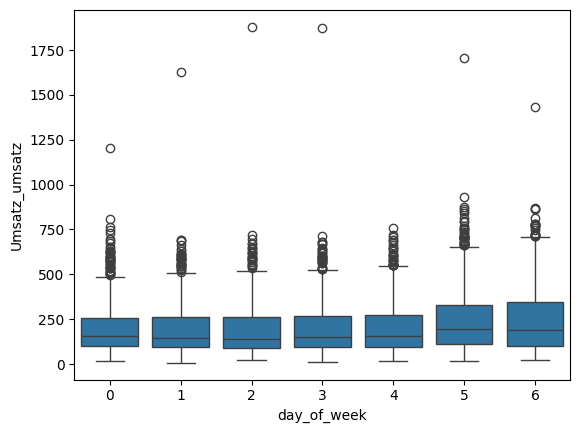

In [45]:
# check on which day of week have high sales
sns.boxplot(x='day_of_week', y='Umsatz_umsatz', data=df_merged_extended_weather)
# Calculate average sales per day of the week
avg_sales_by_day = df_merged_extended_weather.groupby('day_of_week')['Umsatz_umsatz'].mean().sort_values(ascending=False)
print(avg_sales_by_day)

month
8     288.522492
7     271.829358
6     226.627640
9     213.935441
5     211.430539
10    210.002890
4     197.351662
2     185.515356
3     182.284023
12    169.640144
1     167.972552
11    154.596543
Name: Umsatz_umsatz, dtype: float64


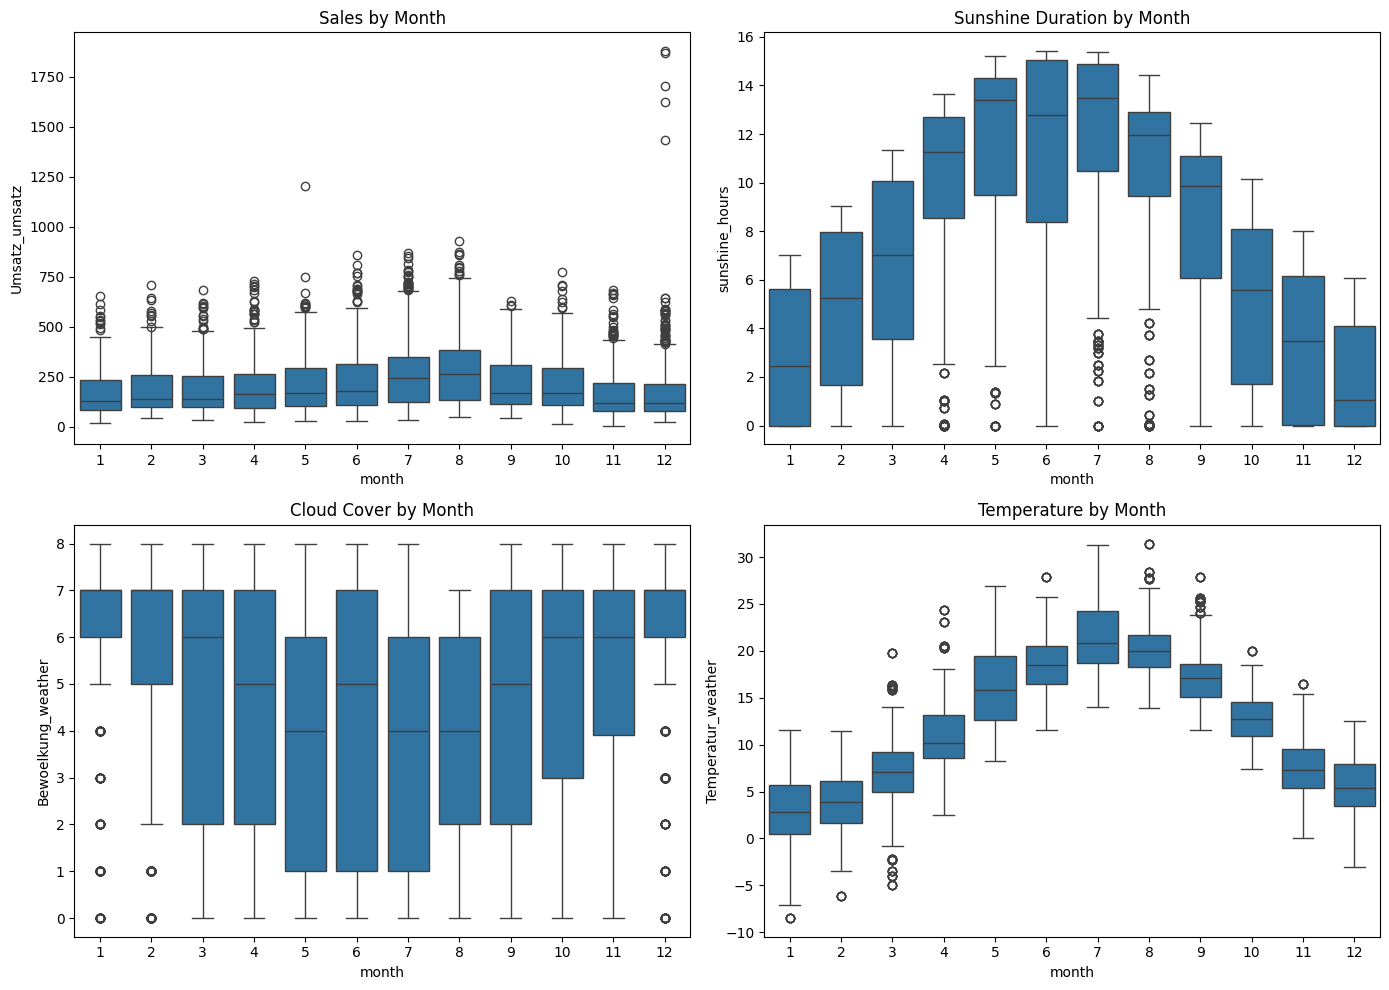

In [46]:
# Extract month from date column (adjust 'Datum' if the column name differs)
df_merged_extended_weather['month'] = pd.to_datetime(df_merged_extended_weather['Datum']).dt.month

# Calculate average sales per month
avg_sales_by_month = df_merged_extended_weather.groupby('month')['Umsatz_umsatz'].mean().sort_values(ascending=False)
print(avg_sales_by_month)

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales by month
sns.boxplot(ax=axes[0, 0], x='month', y='Umsatz_umsatz', data=df_merged_extended_weather)
axes[0, 0].set_title('Sales by Month')

# Sunshine duration by month
sns.boxplot(ax=axes[0, 1], x='month', y='sunshine_hours', data=df_merged_extended_weather)
axes[0, 1].set_title('Sunshine Duration by Month')

# Cloud cover by month
sns.boxplot(ax=axes[1, 0], x='month', y='Bewoelkung_weather', data=df_merged_extended_weather)
axes[1, 0].set_title('Cloud Cover by Month')

sns.boxplot(ax=axes[1, 1], x='month', y='Temperatur_weather', data=df_merged_extended_weather)
axes[1, 1].set_title('Temperature by Month')

plt.tight_layout()
plt.show()

Warengruppe_umsatz
1.0    222177.223458
2.0    732143.699518
3.0    297117.132705
4.0    155326.837913
5.0    503491.030149
6.0     19539.657423
Name: Umsatz_umsatz, dtype: float64


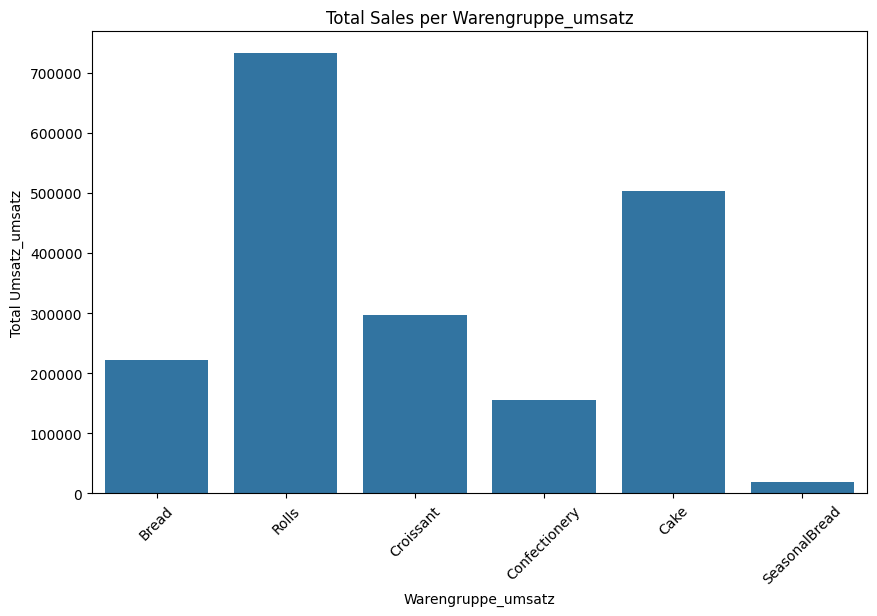

In [47]:
# Calculate total sales per Warengruppe_umsatz
import matplotlib.pyplot as plt
total_sales_by_group = df_merged_extended_weather.groupby('Warengruppe_umsatz')['Umsatz_umsatz'].sum().sort_index()
print(total_sales_by_group)

# Visualize total sales per Warengruppe_umsatz
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_group.index, y=total_sales_by_group.values)
plt.title('Total Sales per Warengruppe_umsatz')
plt.xlabel('Warengruppe_umsatz')
plt.ylabel('Total Umsatz_umsatz')
labels = ['Bread', 'Rolls', 'Croissant', 'Confectionery', 'Cake', 'SeasonalBread']
plt.xticks(ticks=range(len(total_sales_by_group)), labels=labels, rotation=45)
plt.show()